# Projeto-Desafio: Inteligência Artificial na Prática
# Nível I e II - Modelo de Classificação com Dataset Breast Cancer Wisconsin
# Autor: [Gabriela Pires]
# Data: 25/05/2025

# --- 1. Introdução e Justificativa ---
# Este projeto utiliza o dataset Breast Cancer Wisconsin para criar um modelo de classificação binária
# que prevê se um tumor é maligno (1) ou benigno (0) com base em 10 características de imagens de biópsia.
# O dataset foi escolhido por ser um problema de classificação relevante, com 10 variáveis selecionadas (de 30),
# atendendo ao limite do projeto.
# Fonte: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [2]:
# --- 2. Importação das Bibliotecas e Carregamento dos Dados ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pickle


In [5]:
# Carregar o dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnostico'] = data.target  # 0: benigno, 1: maligno

# Selecionar 10 variáveis (primeiras 10 features)
# Traduzindo os nomes das colunas para português
nomes_features = [
    'raio_medio', 'textura_media', 'perimetro_medio', 'area_media', 'suavidade_media',
    'compacidade_media', 'concavidade_media', 'pontos_concavos_medios', 'simetria_media', 'dimensao_fractal_media'
]
selected_features = data.feature_names[:10]
df = df[selected_features].join(df['diagnostico'])
df.columns = nomes_features + ['diagnostico']

# Visualizar as primeiras linhas
print("Primeiras linhas do dataset:")
print(df.head())

Primeiras linhas do dataset:
   raio_medio  textura_media  perimetro_medio  area_media  suavidade_media  \
0       17.99          10.38           122.80      1001.0          0.11840   
1       20.57          17.77           132.90      1326.0          0.08474   
2       19.69          21.25           130.00      1203.0          0.10960   
3       11.42          20.38            77.58       386.1          0.14250   
4       20.29          14.34           135.10      1297.0          0.10030   

   compacidade_media  concavidade_media  pontos_concavos_medios  \
0            0.27760             0.3001                 0.14710   
1            0.07864             0.0869                 0.07017   
2            0.15990             0.1974                 0.12790   
3            0.28390             0.2414                 0.10520   
4            0.13280             0.1980                 0.10430   

   simetria_media  dimensao_fractal_media  diagnostico  
0          0.2419                 0.07871 


Resumo estatístico:
       raio_medio  textura_media  perimetro_medio   area_media  \
count  569.000000     569.000000       569.000000   569.000000   
mean    14.127292      19.289649        91.969033   654.889104   
std      3.524049       4.301036        24.298981   351.914129   
min      6.981000       9.710000        43.790000   143.500000   
25%     11.700000      16.170000        75.170000   420.300000   
50%     13.370000      18.840000        86.240000   551.100000   
75%     15.780000      21.800000       104.100000   782.700000   
max     28.110000      39.280000       188.500000  2501.000000   

       suavidade_media  compacidade_media  concavidade_media  \
count       569.000000         569.000000         569.000000   
mean          0.096360           0.104341           0.088799   
std           0.014064           0.052813           0.079720   
min           0.052630           0.019380           0.000000   
25%           0.086370           0.064920           0.029560   


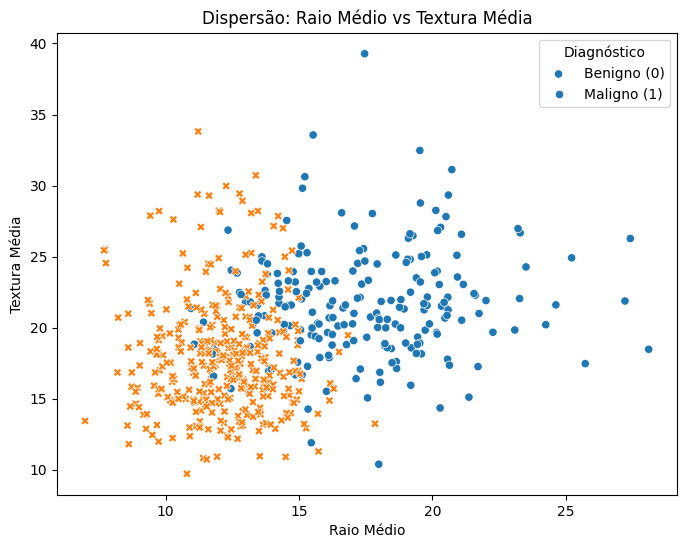

In [6]:
# --- 3. Análise Exploratória ---
# Resumo estatístico
print("\nResumo estatístico:")
print(df.describe())

# Verificar valores faltantes
print("\nValores faltantes:")
print(df.isnull().sum())  # Dataset limpo, sem valores faltantes

# Gráfico de dispersão (scatterplot) para duas variáveis
plt.figure(figsize=(8, 6))
sns.scatterplot(x='raio_medio', y='textura_media', hue='diagnostico', style='diagnostico', data=df)
plt.title('Dispersão: Raio Médio vs Textura Média')
plt.xlabel('Raio Médio')
plt.ylabel('Textura Média')
plt.legend(title='Diagnóstico', labels=['Benigno (0)', 'Maligno (1)'])
plt.show()

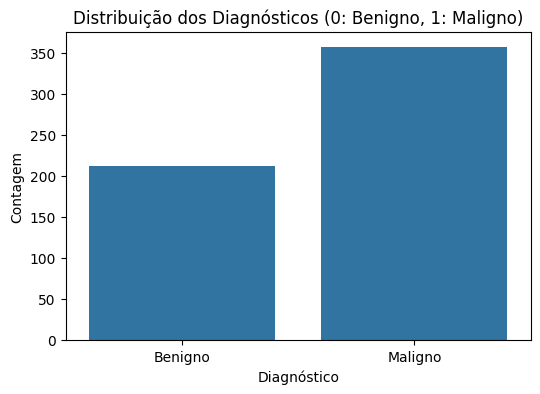

In [ ]:
#Gráfico de barras para a distribuição de diagnósticos
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnostico', data=df)
plt.title('Distribuição dos Diagnósticos (0: Benigno, 1: Maligno)')
plt.xlabel('Diagnóstico')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Benigno', 'Maligno'])
plt.show()

In [9]:
# --- 4. Pré-processamento ---
X = df.drop('diagnostico', axis=1)
y = df['diagnostico']

# Padronizar as features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Salvar o scaler no ambiente do Colab
with open('scaler_cancer_mama.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [10]:
# --- 5. Divisão dos Dados ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
# --- 6. Treinamento e Avaliação dos Modelos (Nível I) ---
# Modelo 1: Regressão Logística
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nAcurácia da Regressão Logística: {acc_lr:.4f}")

# Modelo 2: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia da Random Forest: {acc_rf:.4f}")

# Escolha do melhor modelo (Nível I)
melhor_modelo_nome = 'Regressão Logística' if acc_lr > acc_rf else 'Random Forest'
print(f"\nMelhor modelo (Nível I): {melhor_modelo_nome} com acurácia {max(acc_lr, acc_rf):.4f}")


Acurácia da Regressão Logística: 0.9386
Acurácia da Random Forest: 0.9474

Melhor modelo (Nível I): Random Forest com acurácia 0.9474


In [13]:
# --- 8. Avaliação com 30 Execuções (Nível II) ---
acc_lr_list = []
acc_rf_list = []

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=i)
    lr.fit(X_train, y_train)
    acc_lr_list.append(accuracy_score(y_test, lr.predict(X_test)))
    rf.fit(X_train, y_train)
    acc_rf_list.append(accuracy_score(y_test, rf.predict(X_test)))

print("\nResultados após 30 execuções:")
print(f"Regressão Logística - Média: {np.mean(acc_lr_list):.4f}, Desvio Padrão: {np.std(acc_lr_list):.4f}")
print(f"Random Forest - Média: {np.mean(acc_rf_list):.4f}, Desvio Padrão: {np.std(acc_rf_list):.4f}")

melhor_acuracia = 'Regressão Logística' if np.mean(acc_lr_list) > np.mean(acc_rf_list) else 'Random Forest'
melhor_estabilidade = 'Regressão Logística' if np.std(acc_lr_list) < np.std(acc_rf_list) else 'Random Forest'
print(f"Modelo com maior acurácia: {melhor_acuracia}")
print(f"Modelo mais estável (menor desvio padrão): {melhor_estabilidade}")


Resultados após 30 execuções:
Regressão Logística - Média: 0.9398, Desvio Padrão: 0.0160
Random Forest - Média: 0.9392, Desvio Padrão: 0.0171
Modelo com maior acurácia: Regressão Logística
Modelo mais estável (menor desvio padrão): Regressão Logística


In [ ]:
# --- 9. Salvar o Melhor Modelo (Nível II) ---
best_model = lr if np.mean(acc_lr_list) > np.mean(acc_rf_list) else rf
with open('cancer_mama.pkl', 'wb') as file:
    pickle.dump(best_model, file)
print("Modelo salvo como 'melhor_modelo_cancer_mama.pkl'")

Modelo salvo como 'melhor_modelo_cancer_mama.pkl'


# Teste

In [17]:
# --- 10. Interface Simples via CLI (Nível II) ---
# Usamos input() e print() para criar uma interface de linha de comando
def predict_breast_cancer_cli():
    print("\n--- Predição de Diagnóstico de Câncer de Mama ---")
    print("Insira os valores das 10 características (baseie-se no resumo estatístico acima):")
    
    # Lista das 10 variáveis para referência
    features = [
        "raio médio", "textura média", "perímetro médio", "área média", "suavidade média",
        "compacidade média", "concavidade média", "pontos côncavos médios", "simetria média", "dimensão fractal média"
    ]
    
    # Solicitar os valores do usuário
    inputs = []
    for feature in features:
        while True:
            try:
                value = float(input(f"{feature}: "))
                inputs.append(value)
                break
            except ValueError:
                print("Por favor, insira um valor numérico válido.")
    
    # Converter os inputs para um array numpy
    input_data = np.array([inputs])
    
    # Padronizar os dados
    input_scaled = scaler.transform(input_data)
    
    # Fazer a predição
    prediction = best_model.predict(input_scaled)
    result = "Maligno" if prediction[0] == 1 else "Benigno"
    
    # Exibir o resultado
    print(f"\nDiagnóstico: {result}")

# Executar a interface CLI
predict_breast_cancer_cli()


--- Predição de Diagnóstico de Câncer de Mama ---
Insira os valores das 10 características (baseie-se no resumo estatístico acima):

Diagnóstico: Maligno


C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Instruções para baixar os arquivos
Este código estará disponível em um repositório GitHub: [https://github.com/Gabipsn11/BreastCancer-IA/tree/main]

# Justificativa

Escolhi este modelo pois nunca havia trabalhado com dados na área de saúde, achei impressionante como a IA está tão avançada ao ponto de detectar isto.

Sigo uma moça no instagram que ela é pesquisadora na área de engenharia da computação

No momento ela está pesquisando como a IA pode combater o cancer 

Acabou que ela abriu os meus olhos pela área de pesquisa na área de programação

Uma grande inspiração para mim

segue o perfil do instagram dela caso tenha interesse: @ipatriciahonorato